In [1]:
from qiskit import *

In [2]:
%matplotlib inline

In [59]:
number = '001101'

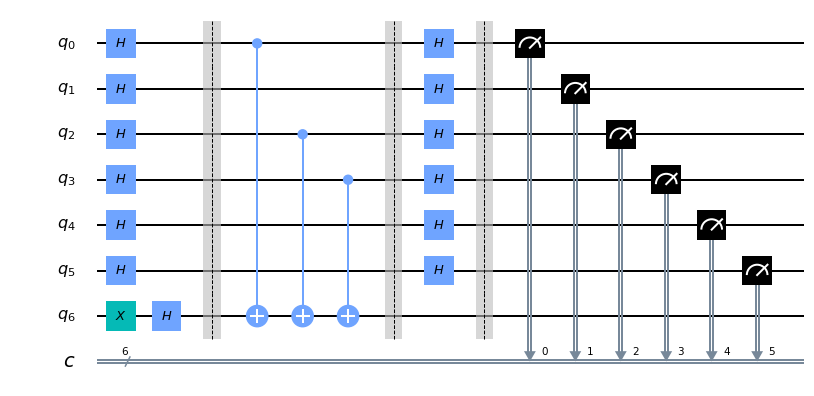

In [60]:
circuit = QuantumCircuit(len(number)+1,len(number))

circuit.h(range(len(number)))
circuit.x(len(number))
circuit.h(len(number))

circuit.barrier()


for i,bol in enumerate(reversed(number)):
    
    if bol == '1':
        circuit.cx(i,len(number))
        
circuit.barrier()
circuit.h(range(len(number)))
circuit.barrier()
circuit.measure(range(len(number)),range(len(number)))

circuit.draw(output='mpl')

In [61]:
simulator = Aer.get_backend('qasm_simulator')

In [62]:
result = execute(circuit, backend=simulator,shots=4096).result()

In [63]:
from qiskit.tools.visualization import plot_histogram,plot_bloch_multivector

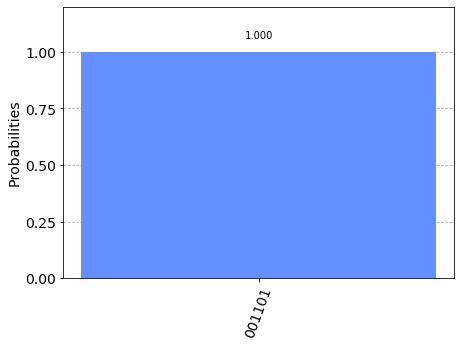

In [64]:
plot_histogram(result.get_counts(circuit))

In [65]:
IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [66]:
provide = IBMQ.get_provider('ibm-q')

In [67]:
qcom = provide.get_backend('ibmq_16_melbourne')

In [68]:
job = execute(circuit,backend= qcom)

In [69]:
from qiskit.tools import job_monitor

In [70]:
job_monitor(job)

Job Status: job has successfully run


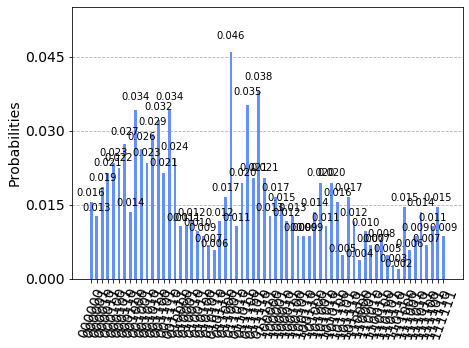

In [71]:
plot_histogram(job.result().get_counts(circuit))